In [113]:
import math

def sigmoid(x):
    if x < -700:
        return 0
    elif x >= 700:
        return 1
    return 1 / (1 + math.exp(-x))

def cross_entropy(y, y_hat):
    return y * np.log(y_hat) - (1-y)*np.log(1-y_hat)

def derivate(weights, y, x1, x2):
    w1,w2,b = weights
    dw1 = (x1 -2*x1*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + x1*y
    dw2 = (x2 -2*x2*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + x2*y
    db = (1 -2*y) / (1 + np.exp(b + w1*x1 + w2*x2) ) + y
    return np.array([dw1, dw2, db])
    
def perceptron(x1, x2, weights, activation_func=sigmoid):
    return activation_func(x1 * weights[0] + x2 + weights[1] + weights[2])

def backpropagation(weights, y, x1, x2):
    #print(weights, derivate(weights, y, x1, x2))
    new_weights = np.add(weights, 0.001*derivate(weights, y, x1, x2))
    return new_weights

def step(x, t=0.4):
    if x>=t:
        return 1
    return 0
#Return the estimation y_hat and the new_weights 
def iteration(weights, y, x1, x2):
    return  step(perceptron(x1,x2, weights)), backpropagation(weights, y, x1, x2)

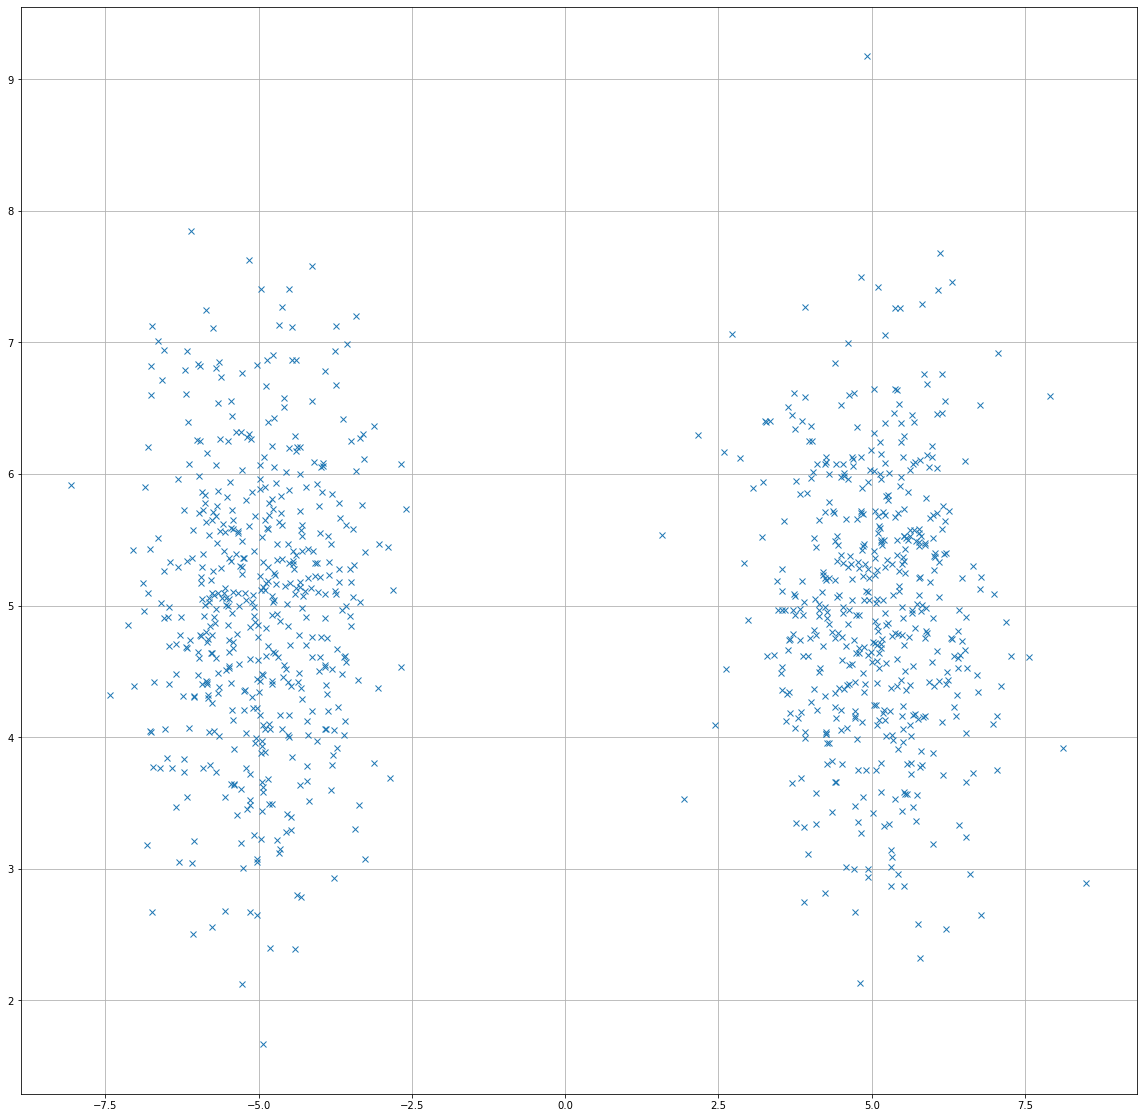

In [110]:
import numpy as np
import matplotlib.pyplot as plt

mu = 5; size = 1000;
#Generate x and label
x = np.concatenate((np.random.normal(mu, 1, int(size/2)), np.random.normal(-mu, 1, int(size/2))))
y = np.concatenate( (np.zeros((int(size/2), 1)), np.ones((int(size/2), 1))) ) 

#Shuffle label and x the same way
randomize = np.arange(len(x))
np.random.shuffle(randomize)
x1 = x[randomize]
y = y[randomize]

#generate Y
x2 = np.random.normal(mu,1, size)

plt.figure(figsize=(20,20))
plt.plot(x1,x2, 'x')
plt.grid()
plt.show()

epoch = 0
429
epoch = 1
38
epoch = 2
7
epoch = 3
3
epoch = 4
3
epoch = 5
3
epoch = 6
1
epoch = 7
1
epoch = 8
1
epoch = 9
1
epoch = 10
1
epoch = 11
1
epoch = 12
1
epoch = 13
1
epoch = 14
1
epoch = 15
1
epoch = 16
1
epoch = 17
1
epoch = 18
1
epoch = 19
1
epoch = 20
1
epoch = 21
1
epoch = 22
1
epoch = 23
1
epoch = 24
1
epoch = 25
1
epoch = 26
1
epoch = 27
1
epoch = 28
1
epoch = 29
1
epoch = 30
1
epoch = 31
1
epoch = 32
1
epoch = 33
1
epoch = 34
1
epoch = 35
1
epoch = 36
1
epoch = 37
1
epoch = 38
1
epoch = 39
1
epoch = 40
1
epoch = 41
1
epoch = 42
1
epoch = 43
1
epoch = 44
1
epoch = 45
1
epoch = 46
1
epoch = 47
1
epoch = 48
1
epoch = 49
1
epoch = 50
1
epoch = 51
1
epoch = 52
1
epoch = 53
1
epoch = 54
1
epoch = 55
1
epoch = 56
1
epoch = 57
1
epoch = 58
1
epoch = 59
1
epoch = 60
1
epoch = 61
1
epoch = 62
1
epoch = 63
1
epoch = 64
1
epoch = 65
1
epoch = 66
1
epoch = 67
1
epoch = 68
1
epoch = 69
1
epoch = 70
1
epoch = 71
1
epoch = 72
1
epoch = 73
1
epoch = 74
1
epoch = 75
1
epoch = 76
1
epoch 

c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


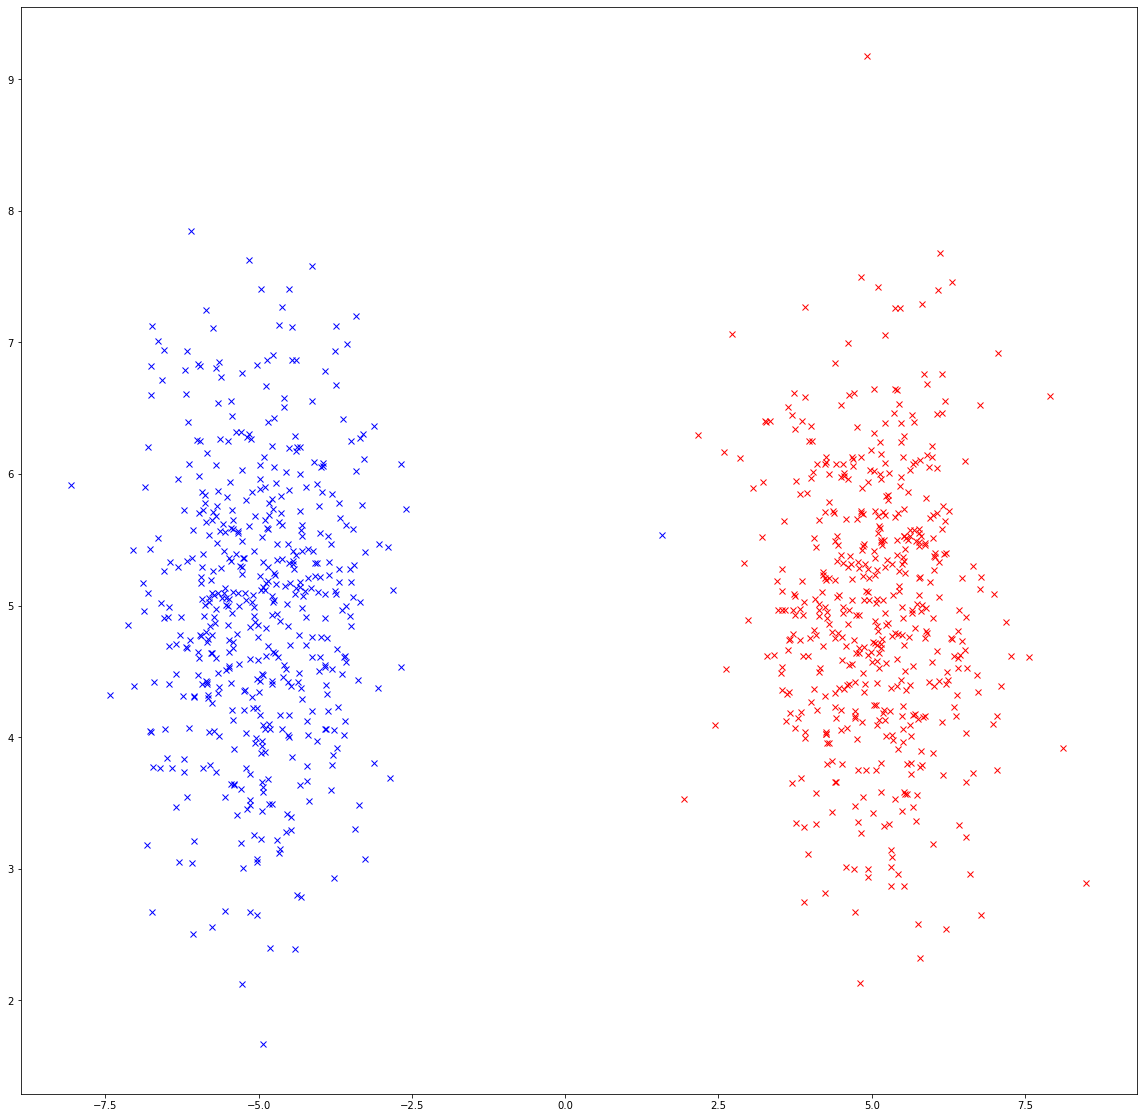

In [116]:
#INIT
init = 1e-10
weights = np.array([init, init, init])
y_hat = []
errors = 0
for epoch in range(100):
    print('epoch = '+str(epoch))
    errors = 0
    y_hat = []
    for i in range(len(x1)):
        y_hat_temp, weights = iteration(weights, y[i,0], x1[i], x2[i])
        y_hat.append(y_hat_temp)
        if y[i,0] != y_hat_temp:
            errors += 1;
    print(errors)    

print(weights)

good_class = []; bad_class = [];
"""
#Display misclassfication
for i in range(len(y_hat)):
    if y[i,0] == y_hat[i]:
        good_class.append(i)
    else:
        bad_class.append(i)
"""
for i in range(len(y_hat)):
    if y_hat[i] == 1:
        good_class.append(i)
    else:
        bad_class.append(i)
        
plt.figure(figsize=(20,20))
plt.plot(x1[good_class],x2[good_class], 'xb')
plt.plot(x1[bad_class],x2[bad_class], 'xr')
plt.show()